<a href="https://colab.research.google.com/github/iharsh70/CodSoft/blob/main/Customer_Churn_Prediction_Task_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier


In [3]:
df = pd.read_csv('/content/Churn_Modelling (1).csv')

In [4]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
df.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [6]:
df.shape

(10000, 14)

In [7]:
df.size

140000

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [9]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [10]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [12]:
df.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [13]:
df.duplicated().sum()

0

In [17]:
df.isnull().values.any()

False

In [18]:
df.index

RangeIndex(start=0, stop=10000, step=1)

In [19]:
print(df["Surname"].unique())
print(df["Geography"].unique())
print(df["Gender"].unique())
print(df["Exited"].unique())

['Hargrave' 'Hill' 'Onio' ... 'Kashiwagi' 'Aldridge' 'Burbidge']
['France' 'Spain' 'Germany']
['Female' 'Male']
[1 0]


In [20]:
df.iloc[0:6]

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1


In [21]:
df.loc[:,'Tenure':'EstimatedSalary']

,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,2,0.00,1,1,1,101348.88
1,1,83807.86,1,0,1,112542.58
2,8,159660.80,3,1,0,113931.57
3,1,0.00,2,0,0,93826.63
4,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...
9995,5,0.00,2,1,0,96270.64
9996,10,57369.61,1,1,1,101699.77
9997,7,0.00,1,0,1,42085.58
9998,3,75075.31,2,1,0,92888.52


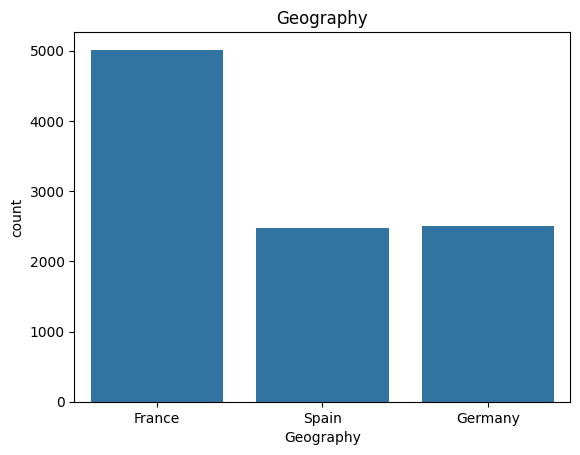

In [31]:
sns.countplot(x='Geography', data=df)
plt.title('Geography')
plt.show()

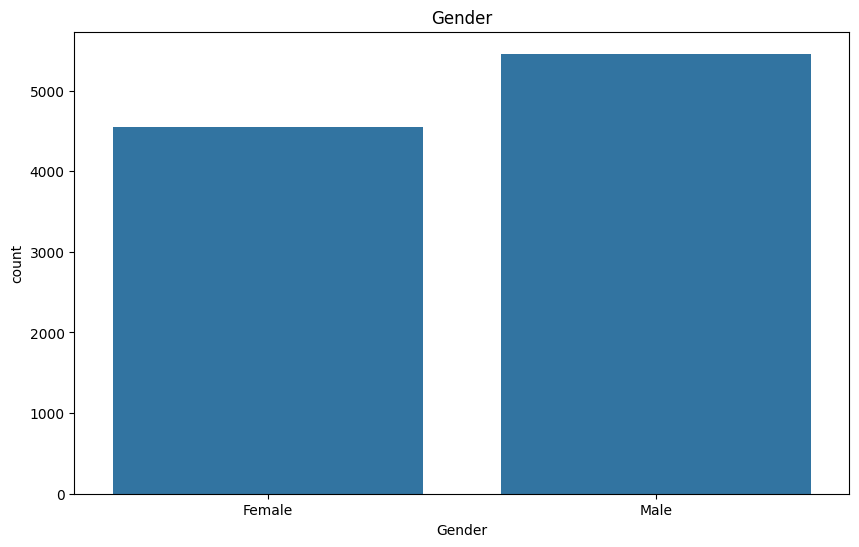

In [32]:
plt.figure(figsize=(10,6))
sns.countplot(x='Gender', data=df)
plt.title('Gender')
plt.show()

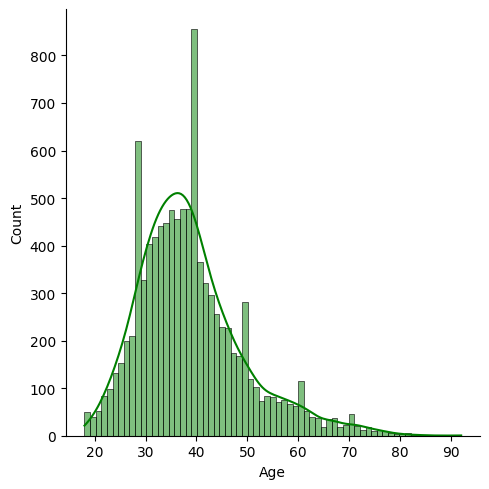

In [34]:
sns.displot(df.Age,kde=True,color='green')

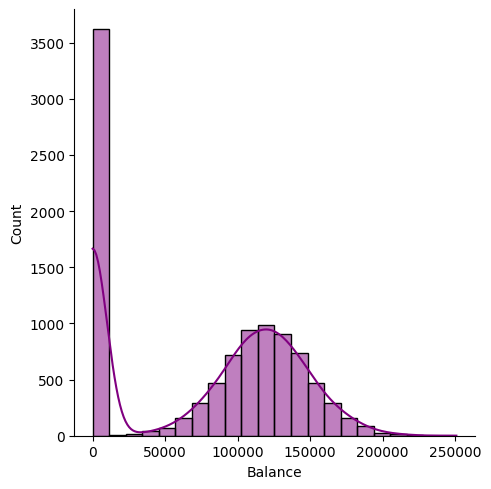

In [35]:
sns.displot(df.Balance,kde=True,color='purple')

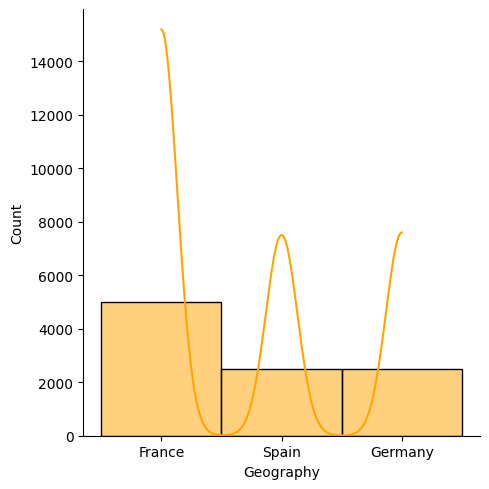

In [36]:
sns.displot(df.Geography,kde=True,color='orange')

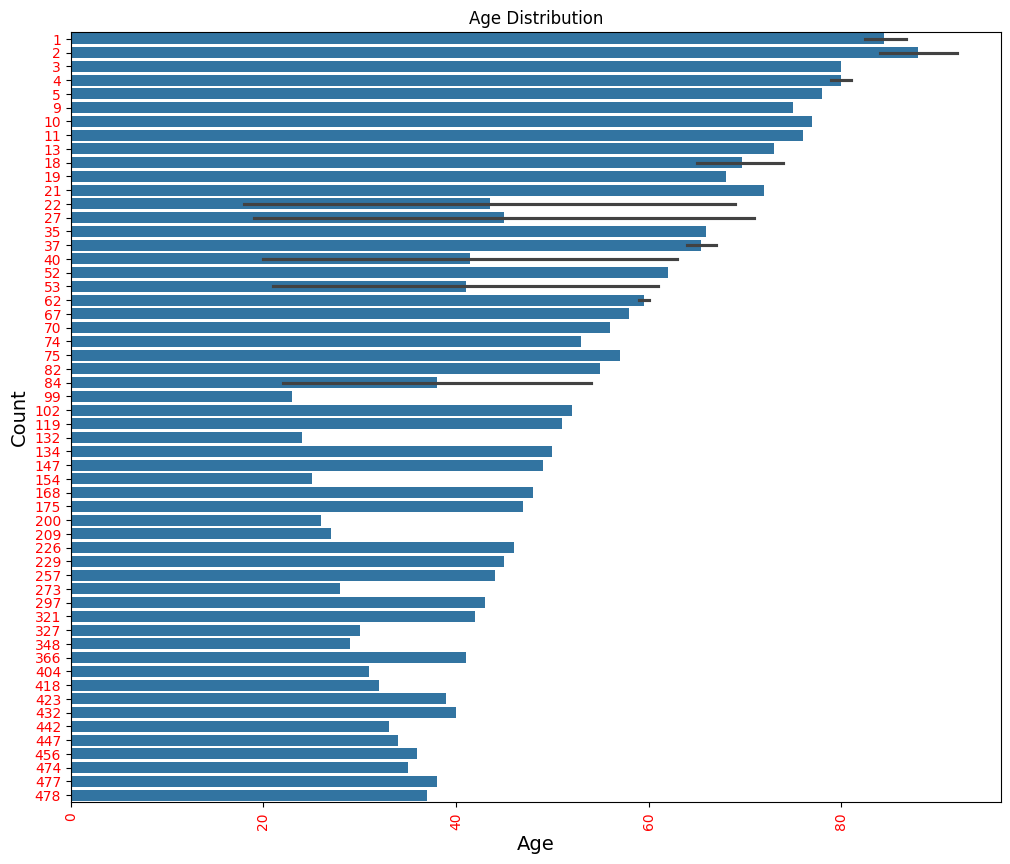

In [47]:
plt.figure(figsize = (12,10))
count1 = df.Age.value_counts()
sns.barplot(x=count1.index, y=count1.values, orient='h')
plt.xlabel('Age', fontsize = 14, fontweight = 'medium')
plt.ylabel('Count', fontsize = 14, fontweight = 'medium')
plt.title('Age Distribution')
plt.xticks(rotation=90, color = 'red')
plt.yticks(rotation=0, color = 'red')
plt.show()

In [54]:
numeric_df = df.select_dtypes(include=[np.number])

<function matplotlib.pyplot.show(close=None, block=None)>

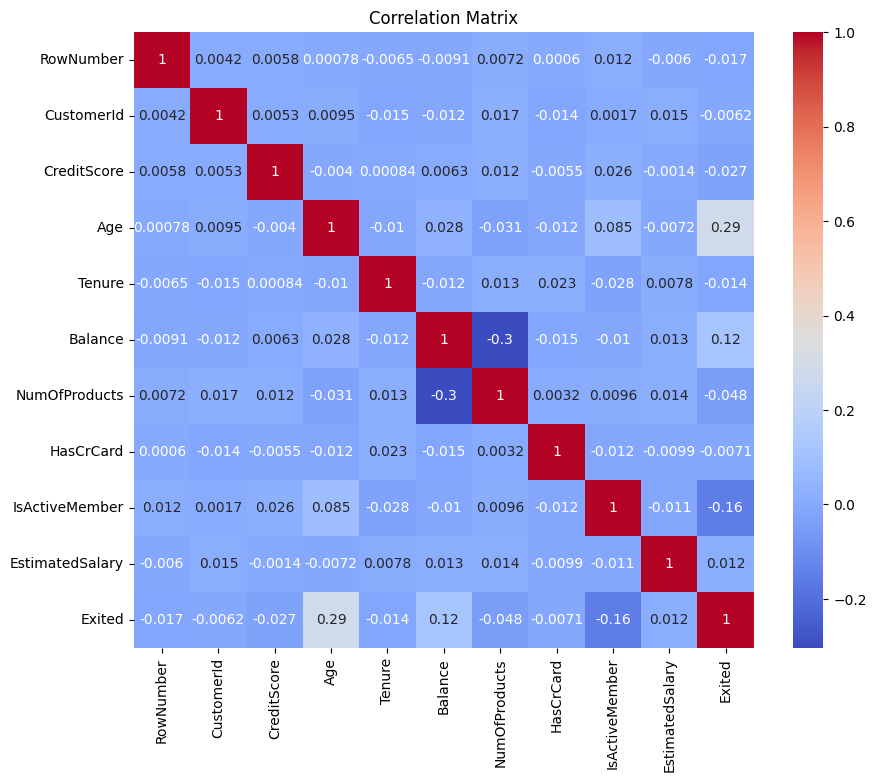

In [55]:
correlation_matrix = numeric_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show

In [56]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [59]:
df.drop(labels = ['CreditScore','Geography'], axis = 1, inplace = True)

In [60]:
df = pd.get_dummies(df, drop_first=True)

In [61]:
df.head()

,RowNumber,CustomerId,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,...,Surname_Zito,Surname_Zotov,Surname_Zotova,Surname_Zox,Surname_Zubarev,Surname_Zubareva,Surname_Zuev,Surname_Zuyev,Surname_Zuyeva,Gender_Male
0,1,15634602,42,2,0.00,1,1,1,101348.88,1,...,False,False,False,False,False,False,False,False,False,False
1,2,15647311,41,1,83807.86,1,0,1,112542.58,0,...,False,False,False,False,False,False,False,False,False,False
2,3,15619304,42,8,159660.80,3,1,0,113931.57,1,...,False,False,False,False,False,False,False,False,False,False
3,4,15701354,39,1,0.00,2,0,0,93826.63,0,...,False,False,False,False,False,False,False,False,False,False
4,5,15737888,43,2,125510.82,1,1,1,79084.10,0,...,False,False,False,False,False,False,False,False,False,False


In [62]:
x = df.drop('Exited', axis=1)
y = df['Exited']

In [64]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=32)

In [65]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [66]:
lr_model = LogisticRegression()
lr_model.fit(x_train, y_train)

LogisticRegression()

In [67]:
lr_pred = lr_model.predict(x_test)

In [70]:
print('Logistic Regression Model:')
print('Accuracy:', accuracy_score(y_test, lr_pred))
print('Confusion Matrix:\n', confusion_matrix(y_test, lr_pred))
print('Classification Report:\n', classification_report(y_test, lr_pred))



Logistic Regression Model:
Accuracy: 0.76075
Confusion Matrix:
 [[2887  297]
 [ 660  156]]
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.91      0.86      3184
           1       0.34      0.19      0.25       816

    accuracy                           0.76      4000
   macro avg       0.58      0.55      0.55      4000
weighted avg       0.72      0.76      0.73      4000



In [71]:
RandomForest_model = RandomForestClassifier()
RandomForest_model.fit(x_train, y_train)

RandomForestClassifier()

In [72]:
RandomForest_pred = RandomForest_model.predict(x_test)

In [73]:
print('Random Forest Model:')
print('Accuracy:', accuracy_score(y_test, RandomForest_pred))
print('Confusion Matrix:\n', confusion_matrix(y_test, RandomForest_pred))
print('Classification Report:\n', classification_report(y_test, RandomForest_pred))

Random Forest Model:
Accuracy: 0.8505
Confusion Matrix:
 [[3121   63]
 [ 535  281]]
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.98      0.91      3184
           1       0.82      0.34      0.48       816

    accuracy                           0.85      4000
   macro avg       0.84      0.66      0.70      4000
weighted avg       0.85      0.85      0.83      4000



In [77]:
GradientBoosting_model = GradientBoostingClassifier(max_depth = 2, learning_rate = 0.4)
GradientBoosting_model.fit(x_train, y_train)

GradientBoostingClassifier(learning_rate=0.4, max_depth=2)

In [78]:
GradientBoosting_pred = GradientBoosting_model.predict(x_test)

In [81]:
print('Gradient Boosting Model:')
print('Accuracy:', accuracy_score(y_test, GradientBoosting_pred))
print('Confusion Matrix:\n', confusion_matrix(y_test, GradientBoosting_pred))
print('Classification Report:\n', classification_report(y_test, GradientBoosting_pred))

Gradient Boosting Model:
Accuracy: 0.84425
Confusion Matrix:
 [[3028  156]
 [ 467  349]]
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.95      0.91      3184
           1       0.69      0.43      0.53       816

    accuracy                           0.84      4000
   macro avg       0.78      0.69      0.72      4000
weighted avg       0.83      0.84      0.83      4000

